# **`FRED API`**

We will make use of an API provided by the Federal Reserve Bank of St Louis.

The API is designed to facilitate the retrieval of economic data from FRED, which is a comprehensive source for U.S. economic data provided by the Federal Reserve Bank of St. Louis.

We chose to use the FRED API as it provides easy access to reliable economic data that is relevant to our analysis of the Exchange Rate between the US Dollar and the Mexican Peso.  As well as exchange rates, you can access a variety of economic data such as the Fed Rate, US and Mexican T-Bill rates, GDP, inflation and oil prices.

Please see https://fred.stlouisfed.org/ for more information on the available data.

In order to make use of the API, it is necessary to install the api via the command:

!pip install fredapi

### Import Required Libraries and Set Up Environment Variables

In [1]:
# Install Fred API, Prophet and dotenv libraries
!pip install fredapi
!pip install prophet
!pip install python-dotenv

In [2]:
# Imports
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy import stats
import seaborn as sns
from prophet import Prophet

# fredapi is a library that provides functionality to interact with the
# FRED (Federal Reserve Economic Data).
# import Fred imports the Fred class (or function) from the fredapi module.
# The fred variable can call methods defined in the Fred class to access
# economic data from the FRED API.
from fredapi import Fred

#### The US dollar (USD) to Mexican peson (MXN) foreign exchange rate.
#### Imagine you are an American going on a vacation to Mexico in three months.   
#### You can exchange your hard earned USD to MXN now or wait until you arrive
#### in Mexico. This project will help you to make an informed decision.  Better
#### yet, you can then learn to apply this methodology when you travel to other
#### foreign countries.

### Access Fred data using api_key

In [4]:
#Load the environment variables
load_dotenv()

# Retrieve API key for FRED
# This api_key is used for authentication when making requests to the
# FRED (Federal Reserve Economic Data) API.
fred_api_key = os.getenv("FRED_API_KEY")

In [5]:
# Initializes a new object of the Fred class and assigns it to the variable
# fred.
# FRED is a free and reliable government data source.
fred = Fred(fred_api_key)

The data being fetched below is crucial for understanding the economic relationship between the U.S. and Mexico, particularly in the context of exchange rates.
### Data Sets Explained:
**Exchange Rate (DEXMXUS):**

Description: This series represents the exchange rate between the U.S. dollar (USD) and the Mexican peso (MXN).

Importance: The exchange rate is a direct reflection of the value of one currency in terms of another. It is influenced by various economic factors, including interest rates, inflation, and economic growth, making it essential for understanding currency valuation.

**U.S. Federal Funds Rate (FEDFUNDS):**

Description: This is the interest rate at which banks lend reserve balances to other depository institutions overnight.

Importance: The federal funds rate is a key tool of U.S. monetary policy. Changes in this rate can influence economic activity, inflation, and ultimately, the exchange rate. Higher interest rates typically attract foreign capital, increasing demand for the USD and potentially strengthening it against other currencies, including the MXN.

**U.S. 90-Day Treasury Bill Rate (TB3MS):**

Description: This rate reflects the yield on U.S. Treasury bills with a maturity of 90 days.

Importance: Treasury bill rates are considered a risk-free benchmark for short-term interest rates. They influence other interest rates in the economy and can impact investor decisions regarding currency investments. A higher T-bill rate may attract foreign investors, increasing demand for the USD.

**Mexico's 90-Day Treasury Bill Rate (INTGSTMXM193N):**

Description: This rate represents the yield on Mexican Treasury bills with a maturity of 90 days.

Importance: Similar to the U.S. T-bill rate, this rate reflects the risk-free return available in Mexico. If the rate is higher than that of the U.S., it may attract investment into Mexico, increasing demand for the MXN and potentially affecting the exchange rate.

**U.S. Real GDP (GDPC1):**

Description: This is the inflation-adjusted measure of the total economic output of the U.S.

Importance: GDP growth indicates the health of the economy. Strong economic growth can lead to higher interest rates as the central bank may raise rates to control inflation, which can strengthen the USD against other currencies.

**Mexico's Real GDP (NGDPRSAXDCMXQ):**

Description: This is the inflation-adjusted measure of Mexico's total economic output.

Importance: Similar to the U.S. GDP, growth in Mexico's GDP can influence the strength of the MXN. If Mexico's economy is growing faster than the U.S. economy, it may lead to a stronger MXN relative to the USD.

**U.S. Inflation Rate (CPIAUCSL):**

Description: This series measures the Consumer Price Index for All Urban Consumers (CPI-U) in the U.S., which reflects changes in the price level of a basket of consumer goods and services.

Importance: The inflation rate is a critical indicator of economic health. Rising inflation can erode purchasing power and influence monetary policy decisions, which can affect the exchange rate between the USD and MXN.

**Mexico Inflation Rate (MEXCPIALLMINMEI):**

Description: This series measures the inflation rate in Mexico, reflecting changes in the price level of consumer goods and services

Importance: Similar to the U.S. inflation rate, the inflation rate in Mexico can impact economic stability and currency valuation. High inflation may lead to depreciation of the MXN against the USD if not managed properly.

**U.S. Unemployment Rate (UNRATE):**

Description: This series represents the unemployment rate in the United States, indicating the percentage of the labor force that is unemployed and actively seeking employment.

Importance: The unemployment rate is a key indicator of economic health. High unemployment can signal economic distress, while low unemployment may indicate a robust economy. Changes in the unemployment rate can influence consumer spending and overall economic growth.

**Mexico Unemployment Rate (LRUN64TTMXA156N):**

Description: This series represents the unemployment rate in Mexico, reflecting the percentage of the labor force that is unemployed and actively seeking work.

Importance: Similar to the U.S. unemployment rate, the unemployment rate in Mexico is crucial for understanding labor market conditions. A rising unemployment rate may indicate economic challenges, while a declining rate can suggest improving economic conditions.'


**Oil Prices (DCOILWTICO):**

Description: This series represents the price of West Texas Intermediate (WTI) crude oil in dollars per barrel.

Importance: Oil prices are a significant factor in both the U.S. and Mexican economies. Fluctuations in oil prices can impact inflation rates, trade balances, and overall economic growth, influencing the exchange rate between the two currencies.


**Summary**

In summary, these data points are interconnected and provide insights into the economic conditions of both the U.S. and Mexico. By analyzing trends in interest rates, GDP growth, inflation rates, oil prices, and exchange rates, the project team can make informed predictions about currency movements and the overall economic relationship between the two countries to benefit our project use case(s).

In [6]:
# Fetch data using fred.get_series().

# Exchange rate: $1 equals Mexican pesos
exchange_rate = fred.get_series("DEXMXUS")

# U.S. fed rate
fed_rate = fred.get_series("FEDFUNDS")

# U.S. 90-days T-bill rate
t_bill_rate = fred.get_series('TB3MS')

# Mexico 90-days T-bill rate
mx_t_bill_rate = fred.get_series('INTGSTMXM193N')

# U.S. Real GDP, adjusted for inflation
us_gdp = fred.get_series('GDPC1')

# Mexico Real GDP, adjusted for inflation
mx_gdp = fred.get_series('NGDPRSAXDCMXQ')

# U.S. Inflation rate
us_cpi = fred.get_series('CPIAUCSL')

# Mexico Inflation rate
mx_cpi = fred.get_series('MEXCPIALLMINMEI')

# U.S. Unemployment
us_unr = fred.get_series('UNRATE')

# Mexico Unemployment
mx_unr = fred.get_series('LRUN64TTMXA156N')

# Oil prices - West Texas Intermediate (WTI) crude oil price in dollars per barrel
oil_price = fred.get_series('DCOILWTICO')


### Create master DataFrame containing all data.

In [7]:
# Combine data into a DataFrame.  This is the main DF.
# Each time series has different start date and availability (daily vs
# monthly).  Note: markets closed on holidays and weekends.
data = pd.DataFrame({
                    'Exchange Rate': exchange_rate,
                    'Fed Rate': fed_rate,
                    'US 90-Day T-bill': t_bill_rate,
                    'MX 90-Day T-bill': mx_t_bill_rate,
                    'US Real GDP': us_gdp,
                    'MX Real GDP': mx_gdp,
                    'US CPI': us_cpi,
                    'MX CPI': mx_cpi,
                    'US Unemployment': us_unr,
                    'MX Unemployment': mx_unr,
                    'Oil Price': oil_price
                    })

In [8]:
# Using shape to get the dimension of the DataFrame.
data.shape

(10899, 11)

In [9]:
# Get the start and end date for each time series in data.
# It is important to have same start and end dates when comparing data.
# Retrieve the start and end dates for each type of data

exchange_rate_series = fred.get_series("DEXMXUS")
print(f"The foreign exchange rate start and end dates: {exchange_rate_series.index.min().strftime('%Y-%m-%d')} \
to {exchange_rate_series.index.max().strftime('%Y-%m-%d')}")

fed_rate_series = fred.get_series("FEDFUNDS")
print(f"The US Fed Rate start and end dates: {fed_rate_series.index.min().strftime('%Y-%m-%d')} \
to {fed_rate_series.index.max().strftime('%Y-%m-%d')}")

t_bill_rate_series = fred.get_series("DTB3")
print(f"The US 90-Day T-bill start and end dates: {t_bill_rate_series.index.min().strftime('%Y-%m-%d')} \
to {t_bill_rate_series.index.max().strftime('%Y-%m-%d')}")

exchange_rate_series = fred.get_series("TB3MS")
print(f"The Mexico 90-Day T-bill start and end dates: {exchange_rate_series.index.min().strftime('%Y-%m-%d')} \
to {exchange_rate_series.index.max().strftime('%Y-%m-%d')}")

us_gdp_series = fred.get_series("GDP")
print(f"The US GDP start and end dates: {us_gdp_series.index.min().strftime('%Y-%m-%d')} \
to {us_gdp_series.index.max().strftime('%Y-%m-%d')}")

mx_gdp_series = fred.get_series("NGDPRSAXDCMXQ")
print(f"The Mexican GDP start and end dates: {mx_gdp_series.index.min().strftime('%Y-%m-%d')} \
to {mx_gdp_series.index.max().strftime('%Y-%m-%d')}")

us_cpi_series = fred.get_series("CPIAUCSL")
print(f"The US CPI start and end dates: {us_cpi_series.index.min().strftime('%Y-%m-%d')} \
to {us_cpi_series.index.max().strftime('%Y-%m-%d')}")

mx_cpi_series = fred.get_series("MEXCPIALLMINMEI")
print(f"The Mexican CPI start and end dates: {mx_cpi_series.index.min().strftime('%Y-%m-%d')} \
to {mx_cpi_series.index.max().strftime('%Y-%m-%d')}")

us_unr_series = fred.get_series("UNRATE")
print(f"The US Unemployment Rate start and end dates: {us_unr_series.index.min().strftime('%Y-%m-%d')} \
to {us_unr_series.index.max().strftime('%Y-%m-%d')}")

mx_unr_series = fred.get_series("LRUN64TTMXA156N")
print(f"The Mexican Unemployment Rate start and end dates: {mx_unr_series.index.min().strftime('%Y-%m-%d')} \
to {mx_unr_series.index.max().strftime('%Y-%m-%d')}")

# Oil Prices - West Texas Intermediate (WTI) crude oil price
oil_price_series = fred.get_series("DCOILWTICO")
print(f"The Oil Price start and end dates: {oil_price_series.index.min().strftime('%Y-%m-%d')} to {oil_price_series.index.max().strftime('%Y-%m-%d')}")



The foreign exchange rate start and end dates: 1993-11-08 to 2024-11-15
The US Fed Rate start and end dates: 1954-07-01 to 2024-10-01
The US 90-Day T-bill start and end dates: 1954-01-04 to 2024-11-15
The Mexico 90-Day T-bill start and end dates: 1934-01-01 to 2024-10-01
The US GDP start and end dates: 1946-01-01 to 2024-07-01
The Mexican GDP start and end dates: 1993-01-01 to 2024-04-01
The US CPI start and end dates: 1947-01-01 to 2024-10-01
The Mexican CPI start and end dates: 1960-01-01 to 2024-07-01
The US Unemployment Rate start and end dates: 1948-01-01 to 2024-10-01
The Mexican Unemployment Rate start and end dates: 2005-01-01 to 2023-01-01
The Oil Price start and end dates: 1986-01-02 to 2024-11-12


In [10]:
# Preview data
# why above US GDP has value for 1946-01-01 but below no value for 1946-01-01
# Exchange Rate nad US on daily basis when market is opened.  Other data
# is based on different time interval (monthly, quarterly)
# Note: 1946-01-01 is default if start_date out of range.
data.tail(50)

,Exchange Rate,Fed Rate,US 90-Day T-bill,MX 90-Day T-bill,US Real GDP,MX Real GDP,US CPI,MX CPI,US Unemployment,MX Unemployment,Oil Price
2024-09-09,19.8845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.65
2024-09-10,20.0831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.73
2024-09-11,19.8377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.25
2024-09-12,19.6029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.89
2024-09-13,19.2589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.59
2024-09-16,19.2510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.10
2024-09-17,19.2769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.16
2024-09-18,19.2802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.87
2024-09-19,19.2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.86
2024-09-20,19.3230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.72


In [11]:
# Use dtpes to check data types
print(data.dtypes)
print(data.index)

Exchange Rate       float64
Fed Rate            float64
US 90-Day T-bill    float64
MX 90-Day T-bill    float64
US Real GDP         float64
MX Real GDP         float64
US CPI              float64
MX CPI              float64
US Unemployment     float64
MX Unemployment     float64
Oil Price           float64
dtype: object
DatetimeIndex(['1934-01-01', '1934-02-01', '1934-03-01', '1934-04-01',
               '1934-05-01', '1934-06-01', '1934-07-01', '1934-08-01',
               '1934-09-01', '1934-10-01',
               ...
               '2024-11-04', '2024-11-05', '2024-11-06', '2024-11-07',
               '2024-11-08', '2024-11-11', '2024-11-12', '2024-11-13',
               '2024-11-14', '2024-11-15'],
              dtype='datetime64[ns]', length=10899, freq=None)


### Create Foreign Exchange DataFrame from Original DataFrame

In [12]:
# Select Exchange Rate columns and store in data_fx
# Only interested in the USD to MX Peso exchange rate for now.
# Obtain the longest time series for Exchange Rate
data_fx = data[['Exchange Rate']]

# Display some rows from data_fx dataframe
data_fx

,Exchange Rate
1934-01-01,NaN
1934-02-01,NaN
1934-03-01,NaN
1934-04-01,NaN
1934-05-01,NaN
...,...
2024-11-11,NaN
2024-11-12,20.5914
2024-11-13,20.5908
2024-11-14,20.5104


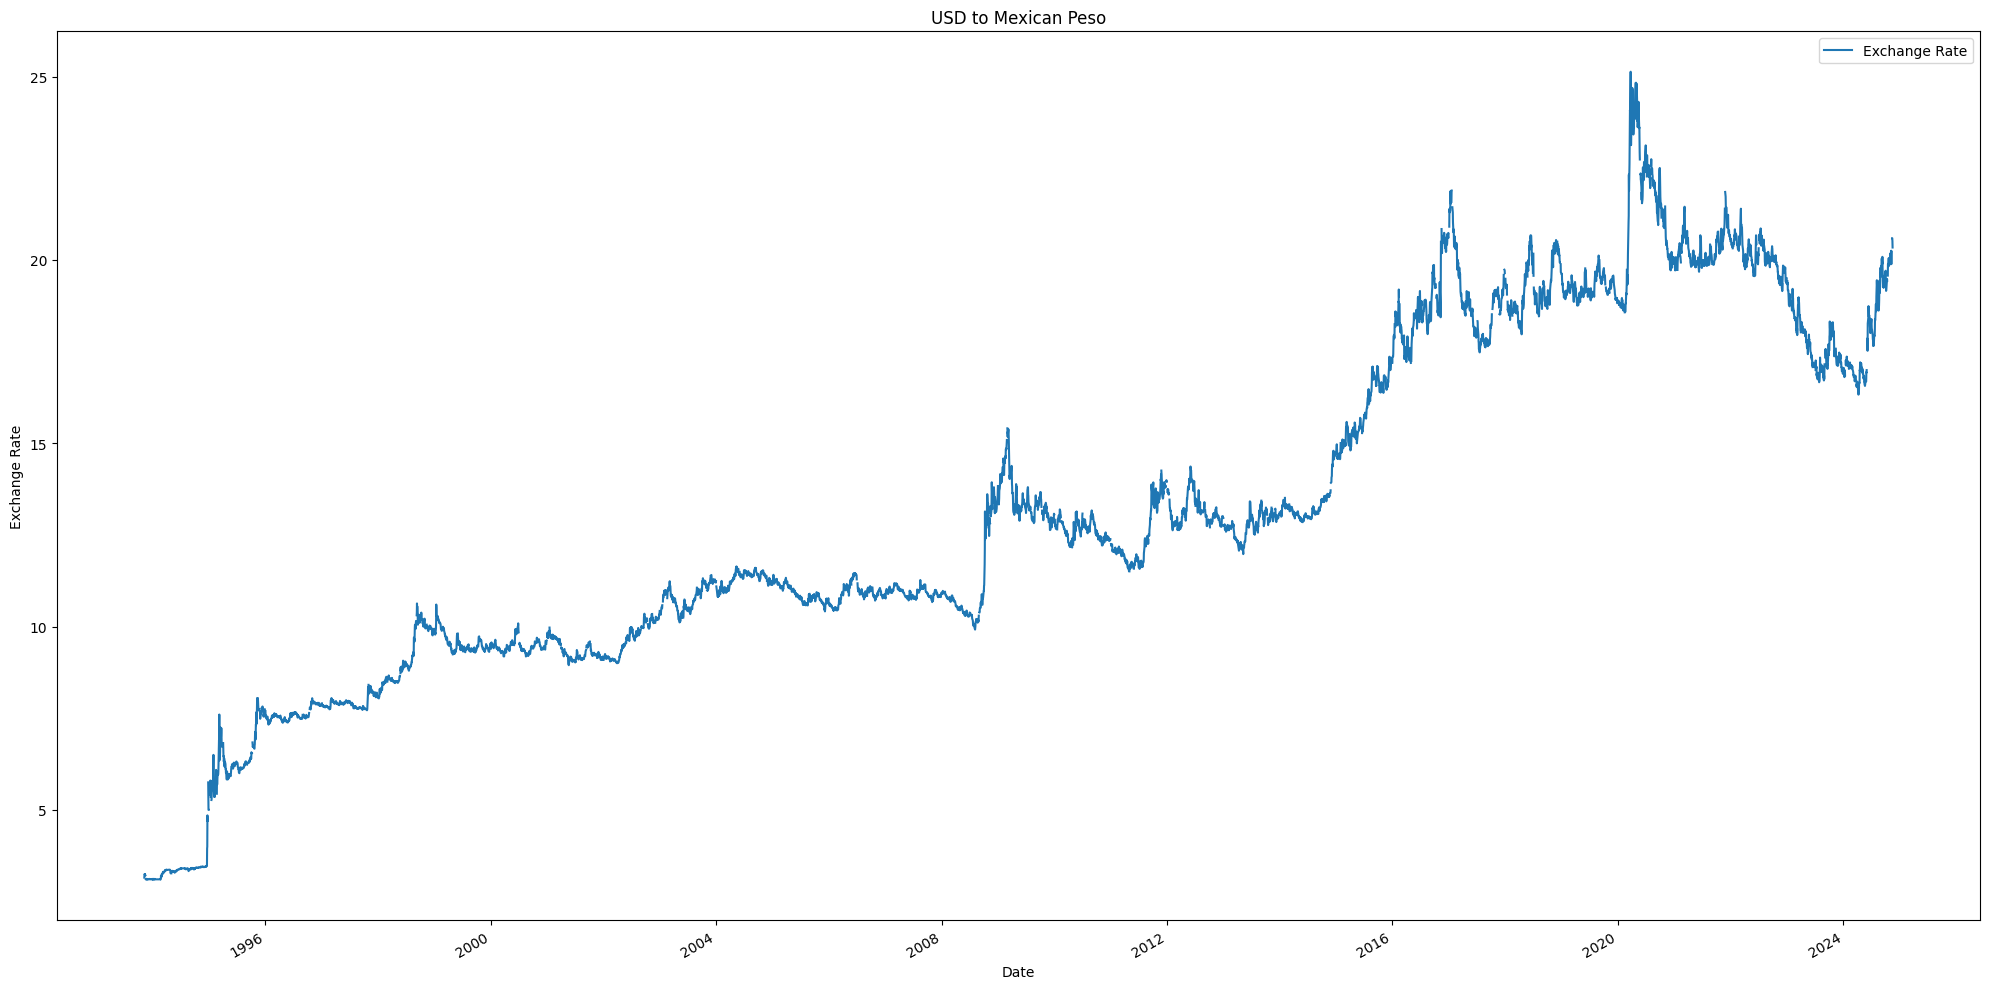

In [13]:
# Plot the Exchange Rate.  Provide title and label x and y-axis labels.
# When the USD to Peso exchange rate increases, the USD appreciates.
# When the USD to Peso exchange rate decreases, the USD depreciates.
# Note the time short time periods when USD appreciates dramaticlly.
# There is an upward trend in USD appreciation against the MXN in the
# past 30 years.

data_fx.plot(title='USD to Mexican Peso', figsize=(20, 10))
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.tight_layout()
plt.show()

### Calculate and plot regression line.

In [14]:
#Check type of Exchange Rate column
print(data_fx["Exchange Rate"].dtype)

float64


In [15]:
# drop null values
data_fx = data_fx.dropna()

In [16]:
# Calculate the y = mx +b line in above graph.  Show calculation and plot the regression line.
# already performed: from scipy import stats and import matplotlib.pyplot as plt

# Perform linear regression
# Convert the index to a numerical format
x = data_fx.index.map(pd.Timestamp.toordinal).values
y = data_fx["Exchange Rate"].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [17]:
# Calculate the predicted y values
regression_line = slope * x + intercept

dates = pd.to_datetime(data_fx.index)

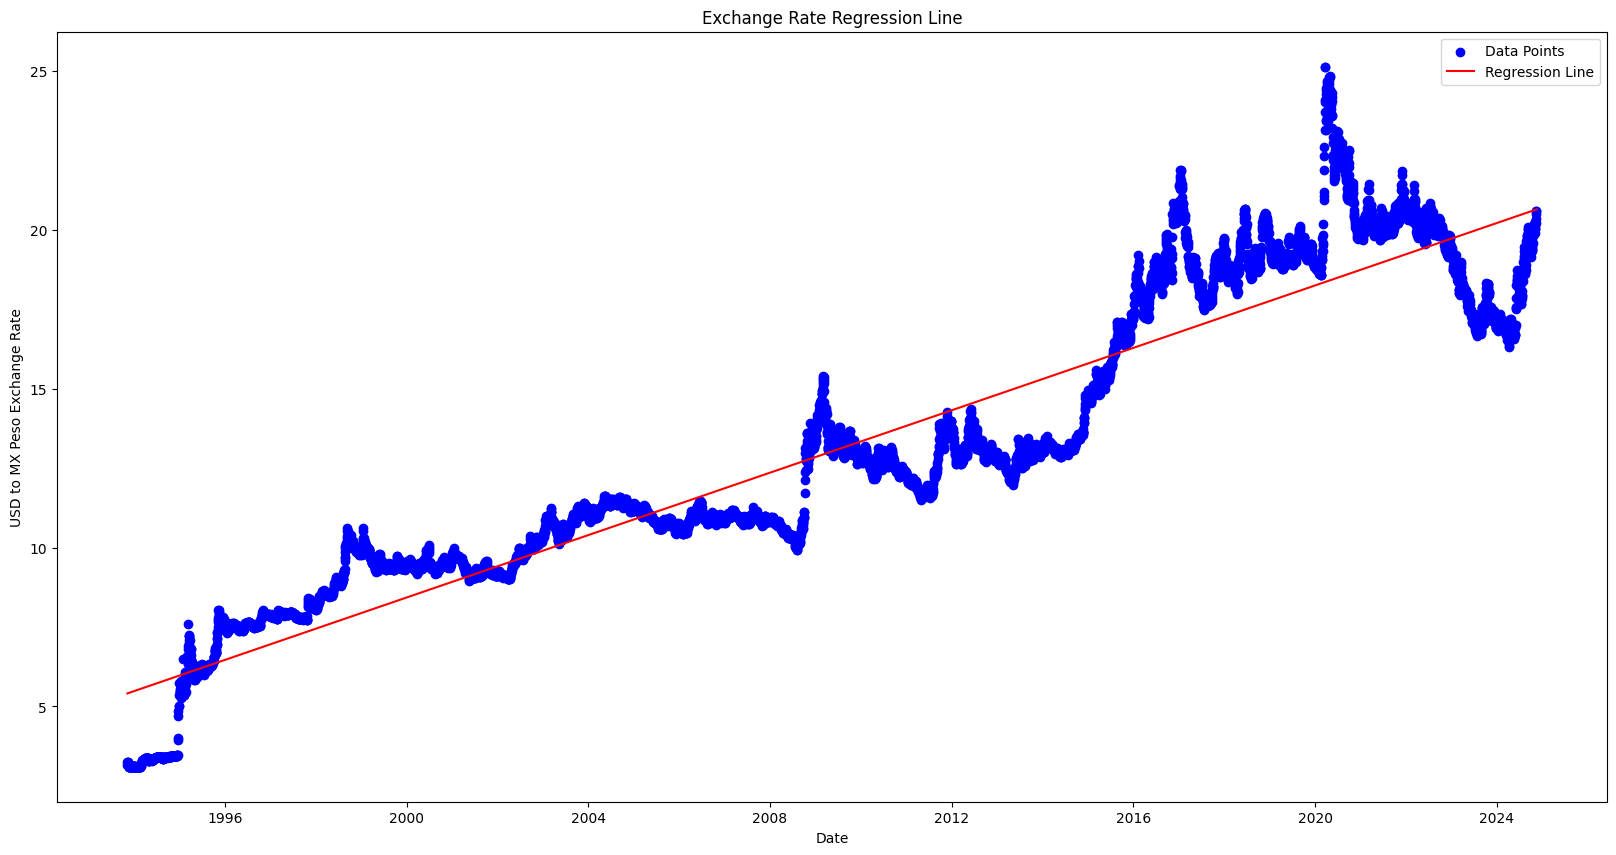

(0.0013444137727998302, -973.1562502763085)

In [18]:
# Plotting
plt.figure(figsize=(20,10))
plt.scatter(data_fx.index, y, label="Data Points", color="blue")
plt.plot(data_fx.index, regression_line, color="red", label="Regression Line")
plt.xlabel("Date")
plt.ylabel("USD to MX Peso Exchange Rate")
plt.title("Exchange Rate Regression Line")
plt.legend()
plt.show()

#print slope and intercept values
slope, intercept



In [19]:
# This simple regression line is based on everything else the same.
# Convert the last day to ordinal
x_current = data_fx.index[-1].toordinal()

In [20]:
# Calculate the x value for 90 days later
x_90_days_later = x_current + 90

In [21]:
# Print slope and intercept values
print(slope)
print(intercept)

0.0013444137727998302
-973.1562502763085


In [22]:
# Calculate the predicted y value (USD to MXN foreign exchange rate)
predicted_y = slope * x_90_days_later + intercept


In [23]:
# Cannot be negataive number
print(f"Predicted value in 90 days: {predicted_y}")

Predicted value in 90 days: 20.76212988574207


### The USD is considered a safe haven during times of economic turmoil.


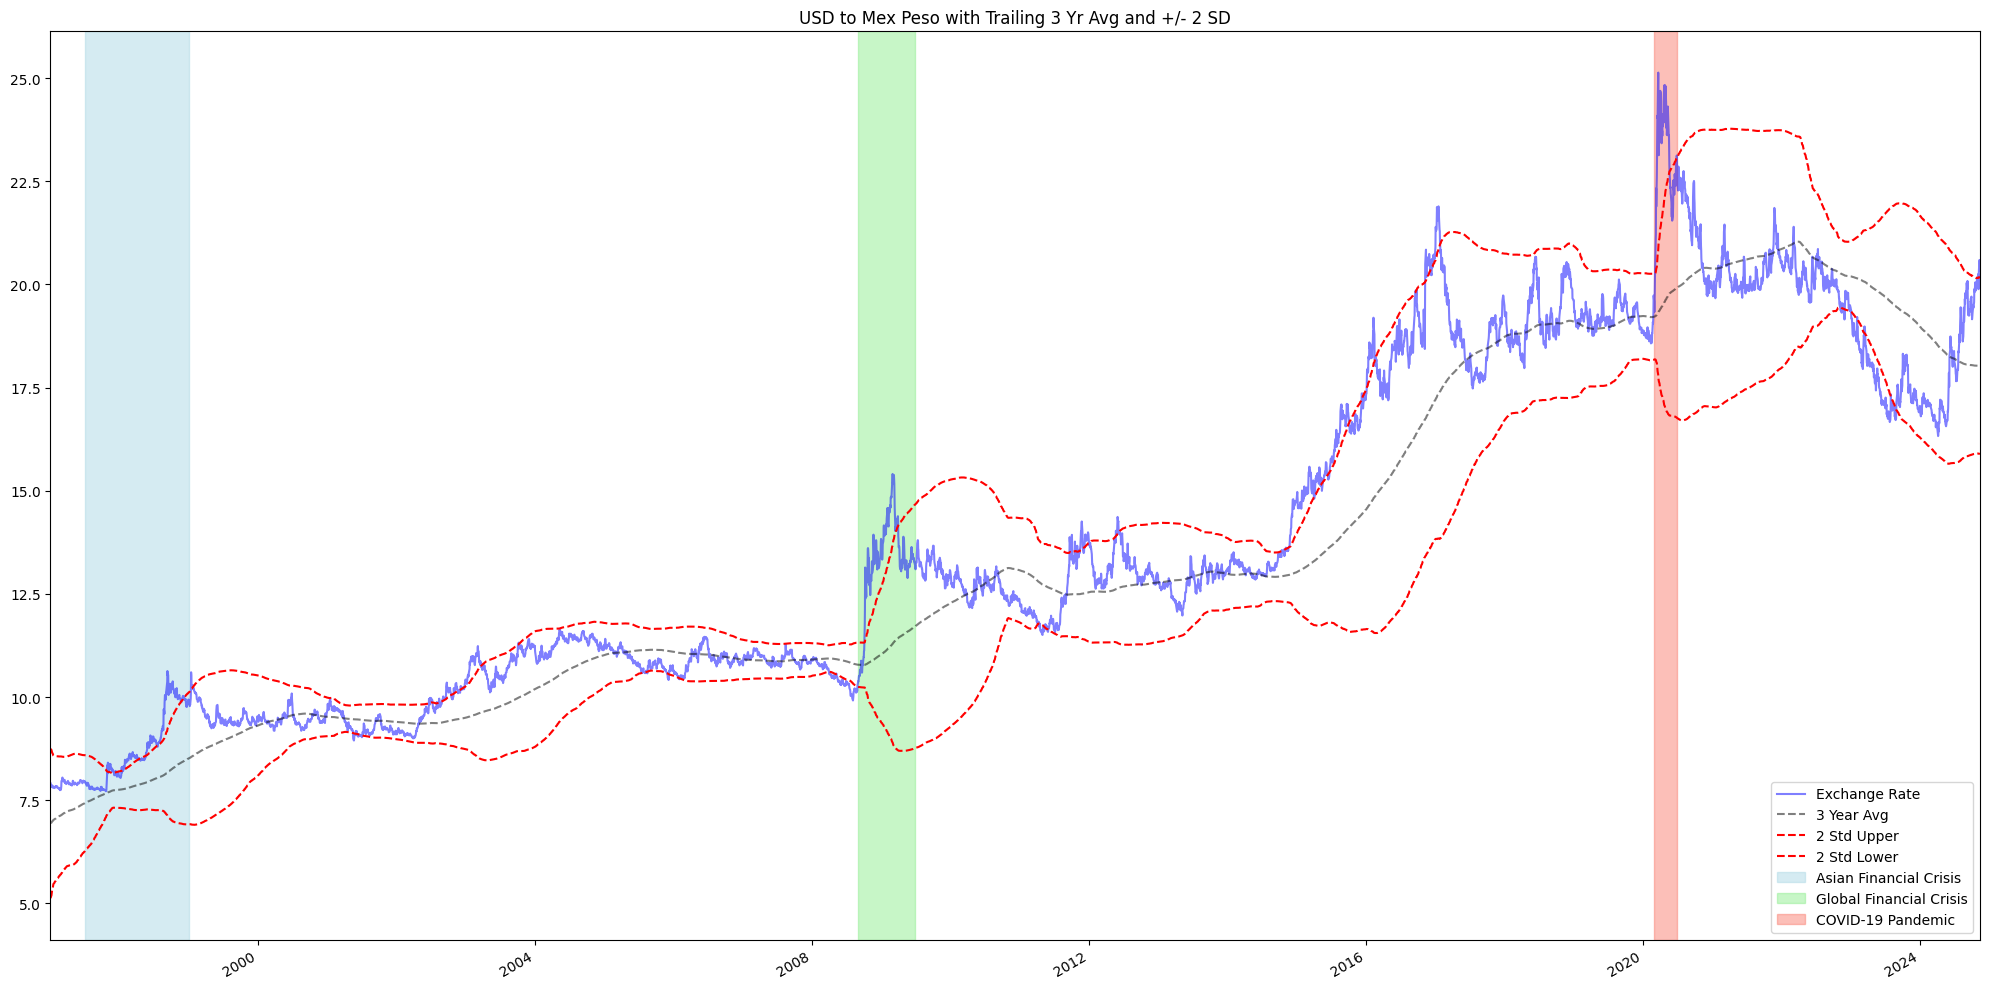

In [25]:
# for loop for each row, set start_date 756 days or 3 years back.
# if data_3_year retrieves 3 years data
# need to adjust if any data is NaN
# Create the average and +/- 2 SD (standard deviation)

# Plot subplots
fig, ax = plt.subplots(figsize=(20, 10))

for row_date in data_fx.index:
    start_date = row_date - pd.DateOffset(days=756)  # Look back 756 days
    data_3_year = data_fx.loc[start_date:row_date, 'Exchange Rate']

    # why not return False or empty for the first three years
    if not data_3_year.empty:
        avg = data_3_year.mean()
        std = data_3_year.std()

        # Assign the computed values using loc
        data_fx.loc[row_date, '1_year_avg'] = avg
        data_fx.loc[row_date, '2_std_upper'] = avg + 2 * std
        data_fx.loc[row_date, '2_std_lower'] = avg - 2 * std

# Filter data to remove empty rows from the first three years.
filtered_data = data_fx.dropna(subset=['1_year_avg', '2_std_upper', '2_std_lower'])

# Filter for dates starting from 1997
filtered_data = filtered_data[filtered_data.index >= pd.Timestamp('1997-01-01')]

# Plotting: calculate current, 3 year moving average, and +/- 2 SD
filtered_data['Exchange Rate'].plot(label='Exchange Rate', color='blue', alpha=0.5)
filtered_data['1_year_avg'].plot(label='3 Year Avg', color='black', linestyle="--", alpha=0.5)
filtered_data['2_std_upper'].plot(label='2 Std Upper', color='red', linestyle='--')
filtered_data['2_std_lower'].plot(label='2 Std Lower', color='red', linestyle='--')

# Major economic events effecting USD to MXN exchanage rate
plt.axvspan(pd.Timestamp('1997-07-01'), pd.Timestamp('1998-12-31'), color='lightblue', alpha=0.5, label='Asian Financial Crisis')
plt.axvspan(pd.Timestamp('2008-09-01'), pd.Timestamp('2009-06-30'), color='lightgreen', alpha=0.5, label='Global Financial Crisis')
plt.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-30'), color='salmon', alpha=0.5, label='COVID-19 Pandemic')

# Set plot title
plt.title('USD to Mex Peso with Trailing 3 Yr Avg and +/- 2 SD')

# Calculate / Specify start date and end date
plot_start_date = mdates.datestr2num('1997-01-01')
plot_end_date = mdates.datestr2num(filtered_data.index[-1].strftime('%Y-%m-%d'))

#Set X limits
ax.set_xlim([plot_start_date, plot_end_date])

# Plot legend and show plot
plt.legend()
plt.tight_layout()
plt.show()


### Correlation

In [26]:
# display some of the rows from the main data dataframe
data

,Exchange Rate,Fed Rate,US 90-Day T-bill,MX 90-Day T-bill,US Real GDP,MX Real GDP,US CPI,MX CPI,US Unemployment,MX Unemployment,Oil Price
1934-01-01,NaN,NaN,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-02-01,NaN,NaN,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-03-01,NaN,NaN,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-04-01,NaN,NaN,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-05-01,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.69
2024-11-12,20.5914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.43
2024-11-13,20.5908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-14,20.5104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Calculate quarterly mean values
quarterly_avg = data.resample('Q').mean()
quarterly_avg

<ipython-input-27-5001cdf47196>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_avg = data.resample('Q').mean()


,Exchange Rate,Fed Rate,US 90-Day T-bill,MX 90-Day T-bill,US Real GDP,MX Real GDP,US CPI,MX CPI,US Unemployment,MX Unemployment,Oil Price
1934-03-31,NaN,NaN,0.526667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-06-30,NaN,NaN,0.153333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-09-30,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-12-31,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935-03-31,NaN,NaN,0.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,17.545556,5.330000,5.283333,11.060000,22960.600,6300104.5,308.099000,149.992967,3.733333,NaN,78.526721
2024-03-31,16.983616,5.330000,5.233333,11.120000,23053.545,6306870.5,310.989667,152.607000,3.800000,NaN,77.503934
2024-06-30,17.222032,5.330000,5.243333,10.976667,23223.906,6316702.0,313.160333,153.259567,4.000000,NaN,81.805714
2024-09-30,18.924516,5.263333,4.990000,10.706667,23386.248,NaN,314.113667,155.157900,4.200000,NaN,76.427500


In [28]:
# Drop null values
quarterly_avg.dropna(inplace=True)
quarterly_avg

,Exchange Rate,Fed Rate,US 90-Day T-bill,MX 90-Day T-bill,US Real GDP,MX Real GDP,US CPI,MX CPI,US Unemployment,MX Unemployment,Oil Price
2005-03-31,11.184419,2.470000,2.536667,9.053333,15844.727,4687957.0,192.366667,66.769560,5.300000,3.677891,49.896393
2006-03-31,10.601253,4.456667,4.393333,7.620000,16353.835,4917909.0,199.466667,69.238640,4.733333,3.681194,63.265323
2007-03-31,11.024155,5.256667,4.983333,7.040000,16611.690,5025603.5,204.317000,72.077503,4.500000,3.765687,58.075000
2008-03-31,10.802661,3.176667,2.043333,7.426667,16843.003,5091017.5,212.769667,74.883067,5.000000,4.030118,97.855410
2009-03-31,14.384074,0.183333,0.213333,7.246667,16298.262,4736663.0,212.377667,79.507393,8.266667,5.558005,43.139672
2010-03-31,12.758708,0.133333,0.106667,4.476667,16582.710,4951693.5,217.374000,83.286570,9.833333,5.506372,78.807049
2011-03-31,12.059774,0.156667,0.126667,4.150000,16920.632,5129689.5,222.043667,86.170790,9.033333,5.366127,94.066129
2012-03-31,12.965690,0.103333,0.066667,4.276667,17367.010,5332265.5,228.326000,89.515300,8.266667,5.084452,102.984194
2013-03-31,12.637628,0.143333,0.086667,4.106667,17662.400,5426441.5,232.299333,92.815530,7.733333,5.104861,94.325500
2014-03-31,13.234033,0.073333,0.046667,3.156667,17953.974,5499415.0,235.621000,96.673987,6.666667,5.002806,98.678197


In [32]:
# Create a correlation matrix
correlation_matrix = quarterly_avg.corr()
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print(correlation_matrix)

                  Exchange Rate  Fed Rate  US 90-Day T-bill  MX 90-Day T-bill  US Real GDP  MX Real GDP    US CPI    MX CPI  US Unemployment  MX Unemployment  Oil Price
Exchange Rate          1.000000 -0.265990         -0.209552          0.040074     0.899183     0.867507  0.831532  0.887773        -0.460545        -0.456477  -0.292626
Fed Rate              -0.265990  1.000000          0.988077          0.756273    -0.066136    -0.121364 -0.137175 -0.164132        -0.567142        -0.619229  -0.135987
US 90-Day T-bill      -0.209552  0.988077          1.000000          0.778230    -0.013699    -0.080433 -0.084126 -0.104535        -0.579354        -0.644142  -0.174901
MX 90-Day T-bill       0.040074  0.756273          0.778230          1.000000     0.132240    -0.001476  0.092407  0.078676        -0.531097        -0.635251  -0.174303
US Real GDP            0.899183 -0.066136         -0.013699          0.132240     1.000000     0.938855  0.968422  0.985534        -0.559079        -0.5668

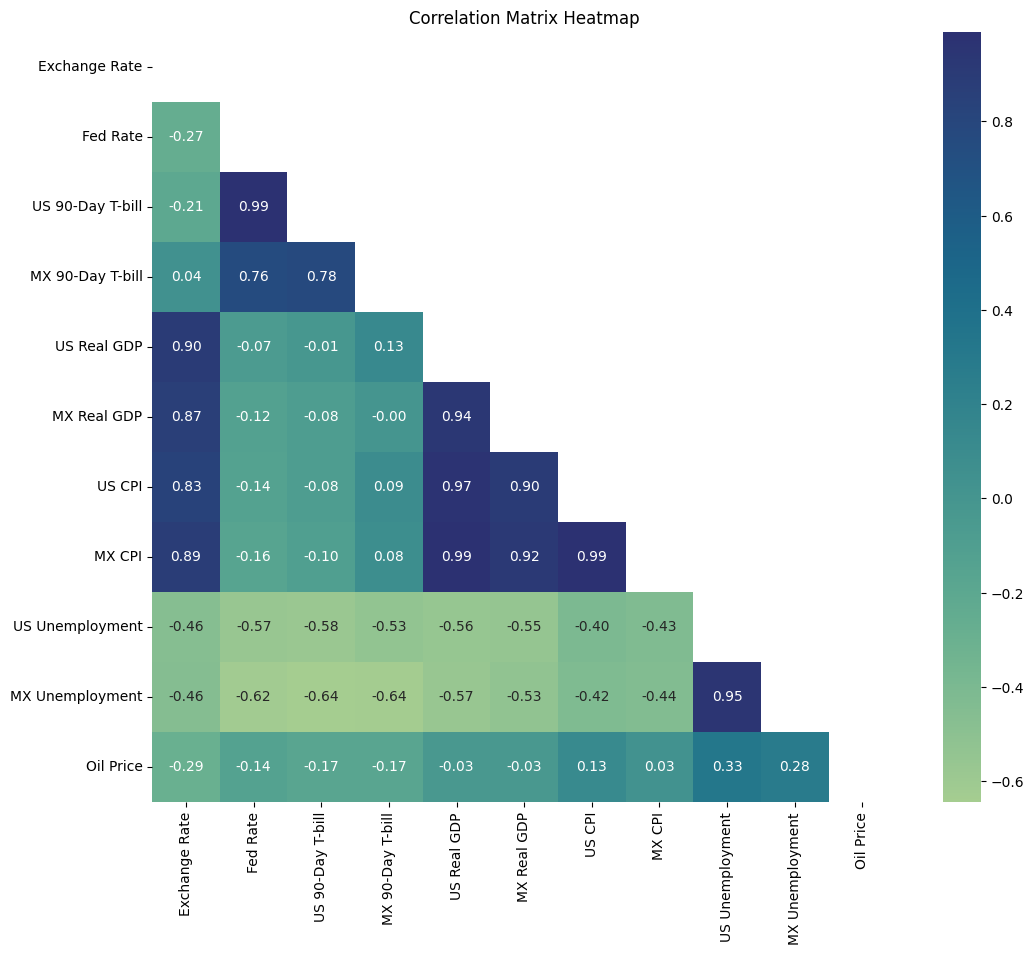

In [33]:
# Create a mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", mask=mask)
plt.title('Correlation Matrix Heatmap')
plt.show()

From the heatmap, you can see a strong correlation between the exchange rate and the GDP of both countries as well as the inflation of both countries.




### Interest Rate Parity (IRP). F = S x (1 + i US)/(1 + i MX).  
##### F is forward exchange rate, S is spot exchange rate (current), i US
##### is US 90 day T-bill and i MX is Mexico 90 day T-bill.
##### Example: F = 18 x (1.02) / (1.05) = 17.78
##### Everything else the same, the USD will depreciate vs MXN.

In [34]:
# Create a new DataFrame from the 'mother' DataFrame.  Use new variable.
data_irp = data[['Exchange Rate', 'US 90-Day T-bill', 'MX 90-Day T-bill']]

In [35]:
# US 90-Day T-bill is daily close; MX 90-Day T-bill is monthly average.
# Therefore, use quarterly average df.resample().mean()
monthly_avg_irp = data_irp.resample('M').mean()
monthly_avg_irp.dropna(inplace=True)
monthly_avg_irp

<ipython-input-35-39cd4411d1ad>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_irp = data_irp.resample('M').mean()


,Exchange Rate,US 90-Day T-bill,MX 90-Day T-bill
1993-11-30,3.149792,3.10,14.38
1993-12-31,3.108314,3.06,11.78
1994-01-31,3.107785,2.98,10.52
1994-02-28,3.121763,3.25,9.45
1994-03-31,3.302632,3.50,9.73
...,...,...,...
2024-05-31,16.803277,5.25,10.99
2024-06-30,18.194637,5.24,10.97
2024-07-31,18.100173,5.20,10.92
2024-08-31,19.138177,5.05,10.76


In [36]:
# Add a new column for "Forward 90 Day Rate"
monthly_avg_irp["Forward 90 Day Rate"] = monthly_avg_irp["Exchange Rate"] * \
                            ( 1 + monthly_avg_irp["US 90-Day T-bill"]/4/100) \
                            / (1 + monthly_avg_irp["MX 90-Day T-bill"]/4/100)

In [37]:
# Display data
monthly_avg_irp

,Exchange Rate,US 90-Day T-bill,MX 90-Day T-bill,Forward 90 Day Rate
1993-11-30,3.149792,3.10,14.38,3.064051
1993-12-31,3.108314,3.06,11.78,3.042491
1994-01-31,3.107785,2.98,10.52,3.050704
1994-02-28,3.121763,3.25,9.45,3.074493
1994-03-31,3.302632,3.50,9.73,3.252415
...,...,...,...,...
2024-05-31,16.803277,5.25,10.99,16.568598
2024-06-30,18.194637,5.24,10.97,17.940956
2024-07-31,18.100173,5.20,10.92,17.848219
2024-08-31,19.138177,5.05,10.76,18.872136


In [38]:
# Shift Forward 90 Day Rate 3 period forward or 90 days.
monthly_avg_irp["Forward 90 Day Rate Shifted"] = monthly_avg_irp["Forward 90 Day Rate"].shift(3)

In [39]:
# Show changes of shift
monthly_avg_irp

,Exchange Rate,US 90-Day T-bill,MX 90-Day T-bill,Forward 90 Day Rate,Forward 90 Day Rate Shifted
1993-11-30,3.149792,3.10,14.38,3.064051,NaN
1993-12-31,3.108314,3.06,11.78,3.042491,NaN
1994-01-31,3.107785,2.98,10.52,3.050704,NaN
1994-02-28,3.121763,3.25,9.45,3.074493,3.064051
1994-03-31,3.302632,3.50,9.73,3.252415,3.042491
...,...,...,...,...,...
2024-05-31,16.803277,5.25,10.99,16.568598,16.852049
2024-06-30,18.194637,5.24,10.97,17.940956,16.533452
2024-07-31,18.100173,5.20,10.92,17.848219,16.566562
2024-08-31,19.138177,5.05,10.76,18.872136,16.568598


In [40]:
# Calculate correlation matrix for only the "Exchange Rate" and "Forward 90 Day Rate" columns
correlation = monthly_avg_irp[['Exchange Rate', 'Forward 90 Day Rate Shifted']].corr()

# Display the correlation matrix
print(correlation)

                             Exchange Rate  Forward 90 Day Rate Shifted
Exchange Rate                     1.000000                     0.984452
Forward 90 Day Rate Shifted       0.984452                     1.000000


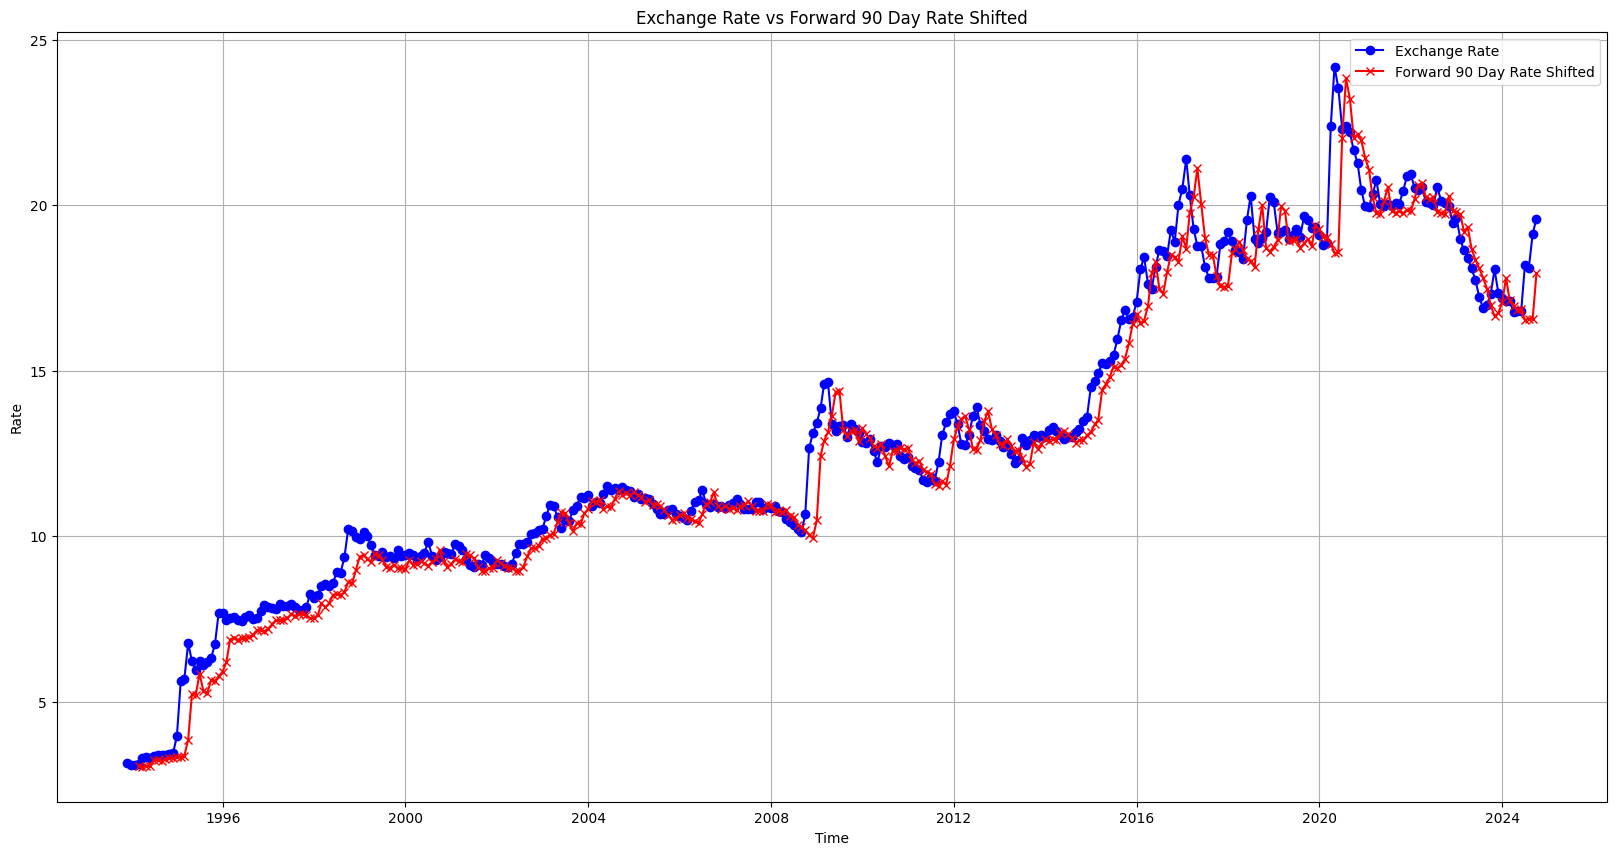

In [41]:
# Create the plot
plt.figure(figsize=(20, 10))  # Set the size of the plot

# Plot Exchange Rate
plt.plot(monthly_avg_irp.index, monthly_avg_irp['Exchange Rate'], label='Exchange Rate', marker='o', linestyle='-', color='b')

# Plot Forward 90 Day Rate Shifted
plt.plot(monthly_avg_irp.index, monthly_avg_irp['Forward 90 Day Rate Shifted'], label='Forward 90 Day Rate Shifted', marker='x', linestyle='-', color='r')

# Add labels and a title
plt.xlabel('Time')  # Label for x-axis
plt.ylabel('Rate')  # Label for y-axis
plt.title('Exchange Rate vs Forward 90 Day Rate Shifted')  # Title for the graph

# Add a legend to differentiate the lines
plt.legend()

# Optionally, add a grid for better visualization
plt.grid(True)

# Display the plot
plt.show()

Create a chart to show a comparison of the US 90-Day T-Bill vs the Mexican 90-Day T-Bill Rates historically:

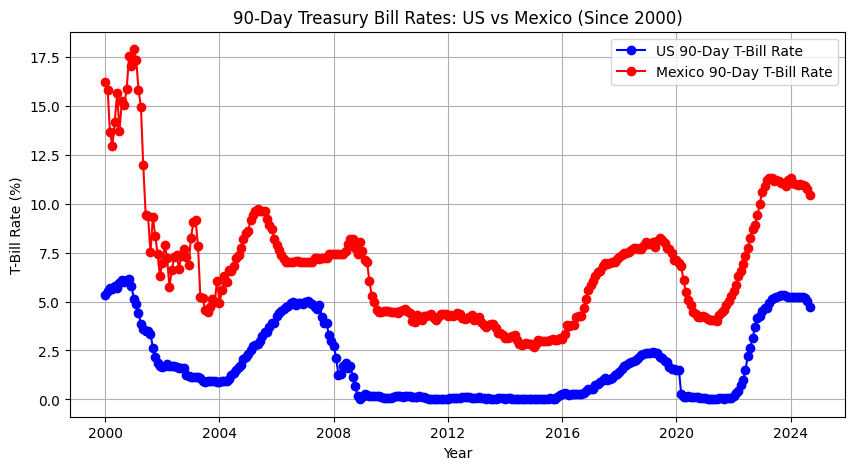

In [42]:
# Filter data since the year 2000
data_90daysTbill = data.loc['2000-01-01':, ['US 90-Day T-bill', 'MX 90-Day T-bill']].dropna()

# Create the figure
plt.figure(figsize=(10, 5))

# Plotting both T-Bill Rates on the same y-axis
plt.plot(data_90daysTbill.index, data_90daysTbill['US 90-Day T-bill'], label='US 90-Day T-Bill Rate', marker='o', color='b')
plt.plot(data_90daysTbill.index, data_90daysTbill['MX 90-Day T-bill'], label='Mexico 90-Day T-Bill Rate', marker='o', color='r')

# Adding titles and labels
plt.title('90-Day Treasury Bill Rates: US vs Mexico (Since 2000)')
plt.xlabel('Year')
plt.ylabel('T-Bill Rate (%)')
plt.legend()
plt.grid()

### Prophet

In [43]:
# Check the shape of the data_fx dataframe
data_fx.shape

(7779, 4)

In [44]:
# Look at the last five rows in the dataframe
data_fx.tail()

,Exchange Rate,1_year_avg,2_std_upper,2_std_lower
2024-11-08,20.2230,18.033922,20.170254,15.897589
2024-11-12,20.5914,18.031179,20.167078,15.895280
2024-11-13,20.5908,18.032242,20.172693,15.891792
2024-11-14,20.5104,18.032984,20.176608,15.889360
2024-11-15,20.3376,18.033576,20.179579,15.887573


In [45]:
# Look at data_fx dataframe info
data_fx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7779 entries, 1993-11-08 to 2024-11-15
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Exchange Rate  7779 non-null   float64
 1   1_year_avg     7779 non-null   float64
 2   2_std_upper    7778 non-null   float64
 3   2_std_lower    7778 non-null   float64
dtypes: float64(4)
memory usage: 561.9 KB


In [46]:
# Create dataframe with just Exchange Rate for use with Prophet
data_fx_for_prophet = data_fx['Exchange Rate']

In [47]:
# Display shape and info for new data_fx_for_prophet dataframe and first five rows
display(data_fx_for_prophet.shape)
display(data_fx_for_prophet.info())
display(data_fx_for_prophet.head())

(7779,)

<class 'pandas.core.series.Series'>
DatetimeIndex: 7779 entries, 1993-11-08 to 2024-11-15
Series name: Exchange Rate
Non-Null Count  Dtype  
--------------  -----  
7779 non-null   float64
dtypes: float64(1)
memory usage: 379.6 KB


None

,Exchange Rate
1993-11-08,3.152
1993-11-09,3.240
1993-11-10,3.240
1993-11-12,3.240
1993-11-15,3.215


There are no null values in the dataframe

In [48]:
# Reset index so that date is no longer in the index and is in a column
data_fx_for_prophet = data_fx_for_prophet.reset_index()

In [49]:
# Look at the last 5 rows in the dataframe to see the new column
data_fx_for_prophet.tail()

,index,Exchange Rate
7774,2024-11-08,20.2230
7775,2024-11-12,20.5914
7776,2024-11-13,20.5908
7777,2024-11-14,20.5104
7778,2024-11-15,20.3376


In [50]:
# rename columns as required by Prophet
data_fx_for_prophet.columns = ['ds', 'y']

In [51]:
# Look at info, first five rows and last five rows of dataframe
display(data_fx_for_prophet.info())
display(data_fx_for_prophet.head())
display(data_fx_for_prophet.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      7779 non-null   datetime64[ns]
 1   y       7779 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 121.7 KB


None

,ds,y
0,1993-11-08,3.152
1,1993-11-09,3.240
2,1993-11-10,3.240
3,1993-11-12,3.240
4,1993-11-15,3.215


,ds,y
7774,2024-11-08,20.2230
7775,2024-11-12,20.5914
7776,2024-11-13,20.5908
7777,2024-11-14,20.5104
7778,2024-11-15,20.3376


In [52]:
#Remove any weekends in case they are present in the data (although we do not believe Exchange rate historical data has weekends)
data_fx_for_prophet = data_fx_for_prophet[data_fx_for_prophet['ds'].dt.weekday < 5]

In [53]:
# Compare to dataframe before any weekends were removed
display(data_fx_for_prophet.info())
display(data_fx_for_prophet.head())
display(data_fx_for_prophet.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      7779 non-null   datetime64[ns]
 1   y       7779 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 121.7 KB


None

,ds,y
0,1993-11-08,3.152
1,1993-11-09,3.240
2,1993-11-10,3.240
3,1993-11-12,3.240
4,1993-11-15,3.215


,ds,y
7774,2024-11-08,20.2230
7775,2024-11-12,20.5914
7776,2024-11-13,20.5908
7777,2024-11-14,20.5104
7778,2024-11-15,20.3376


There were no weekends in the data.

In [54]:
#Call the Prophet function, and store in a variable
model = Prophet()
model

In [55]:
# Fit the prophet model
model.fit(data_fx_for_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsx9dg3pj/mnkbqq4k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsx9dg3pj/rfwtfysc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5844', 'data', 'file=/tmp/tmpsx9dg3pj/mnkbqq4k.json', 'init=/tmp/tmpsx9dg3pj/rfwtfysc.json', 'output', 'file=/tmp/tmpsx9dg3pj/prophet_modelh00cx21h/prophet_model-20241119020432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:04:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [56]:
# Create a future dataframe to hold predictions
# Make the predictions go out as far as 70 business days.  This is approx 3 months out.
future_trends = model.make_future_dataframe(periods=70, freq="B")

# Look at last 20 rows - verfiy that weekends are not included
future_trends.tail(20)

,ds
7829,2025-01-27
7830,2025-01-28
7831,2025-01-29
7832,2025-01-30
7833,2025-01-31
7834,2025-02-03
7835,2025-02-04
7836,2025-02-05
7837,2025-02-06
7838,2025-02-07


In [57]:
# Make the predictions for the trend data using the future trends DataFrame
forecast_trends = model.predict(future_trends)

# Display the first five rows of the forecast dataframe
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1993-11-08,2.416464,1.374746,3.450786,2.416464,2.416464,-0.009379,-0.009379,-0.009379,-0.145328,-0.145328,-0.145328,0.135949,0.135949,0.135949,0.0,0.0,0.0,2.407085
1,1993-11-09,2.422815,1.401384,3.480524,2.422815,2.422815,-0.002158,-0.002158,-0.002158,-0.142703,-0.142703,-0.142703,0.140545,0.140545,0.140545,0.0,0.0,0.0,2.420657
2,1993-11-10,2.429166,1.384673,3.460019,2.429166,2.429166,0.003299,0.003299,0.003299,-0.141262,-0.141262,-0.141262,0.144561,0.144561,0.144561,0.0,0.0,0.0,2.432465
3,1993-11-12,2.441867,1.423923,3.500679,2.441867,2.441867,-0.000555,-0.000555,-0.000555,-0.151077,-0.151077,-0.151077,0.150521,0.150521,0.150521,0.0,0.0,0.0,2.441311
4,1993-11-15,2.460918,1.452955,3.416416,2.460918,2.460918,0.008101,0.008101,0.008101,-0.145328,-0.145328,-0.145328,0.153429,0.153429,0.153429,0.0,0.0,0.0,2.469019


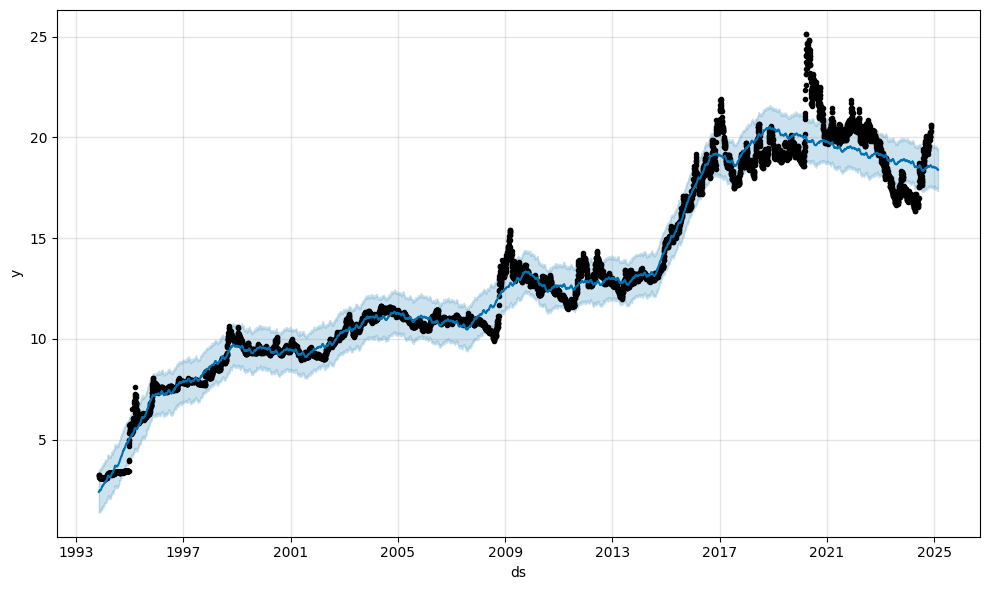

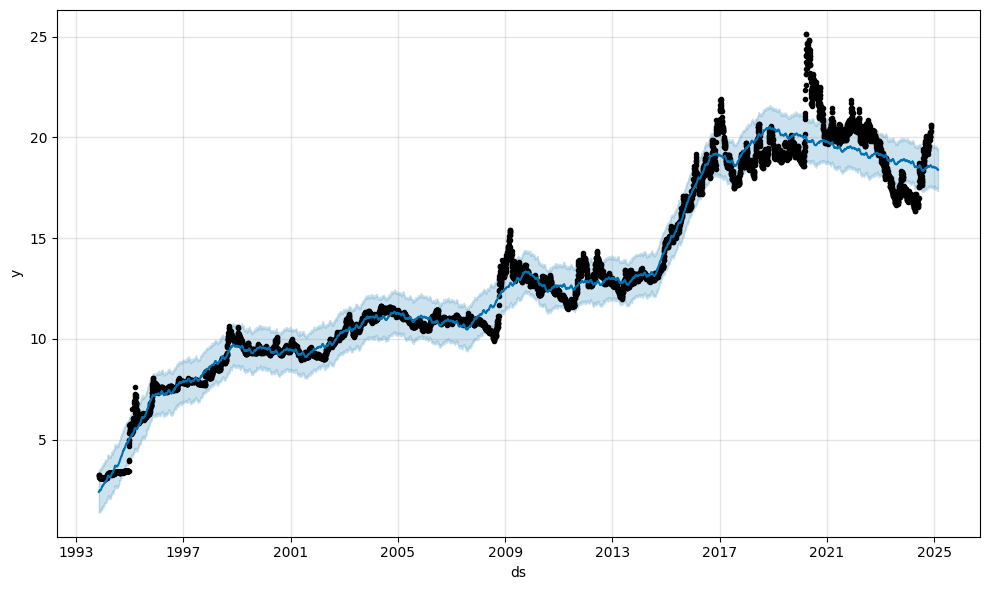

In [58]:
# Plot the Prophet predictions
model.plot(forecast_trends)

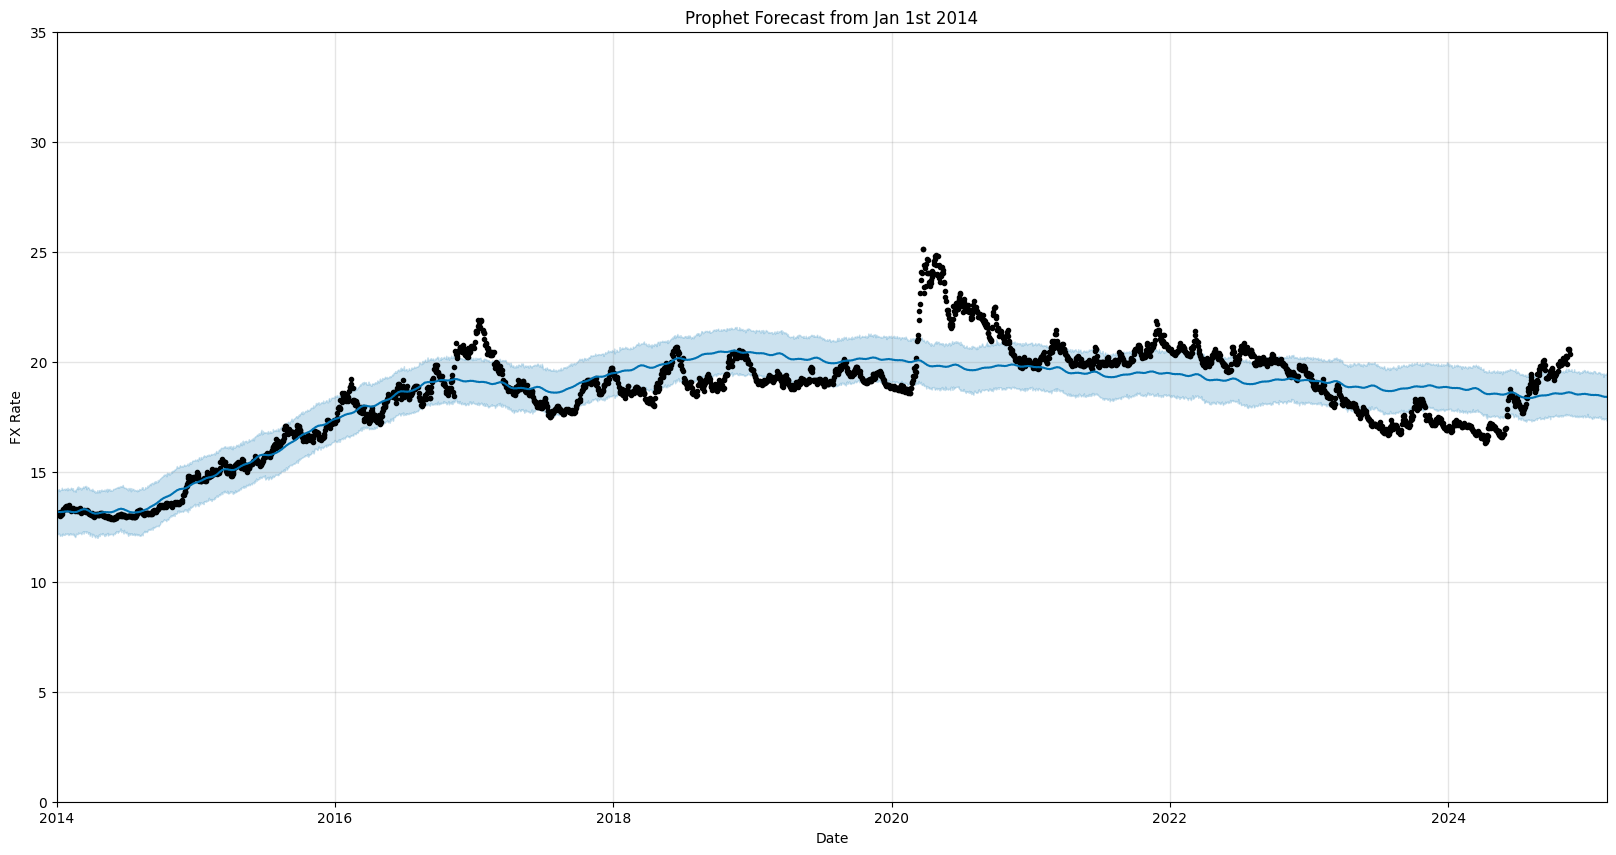

In [60]:
# Create a chart with a 10 year history to see whether it could be used as one of our final charts

# Create dataframe with data from begin Jan 2014
filtered_forecast = forecast_trends[forecast_trends['ds'] >= '2014-01-01']

# Calculate / Specify start and end dates
start_date = mdates.datestr2num('2014-01-01')
end_date = filtered_forecast['ds'].iloc[-1]

# Plot subplots
fig, ax = plt.subplots(figsize=(20, 10))

#Plot chart
model.plot(filtered_forecast, ax=ax)

#Set X, Y labels and Title
ax.set_xlabel('Date')
ax.set_ylabel('FX Rate')
ax.set_title('Prophet Forecast from Jan 1st 2014')

#Set X and Y limits
ax.set_xlim([start_date, end_date])
ax.set_ylim(bottom=0, top=35)

#Show plot
plt.show()

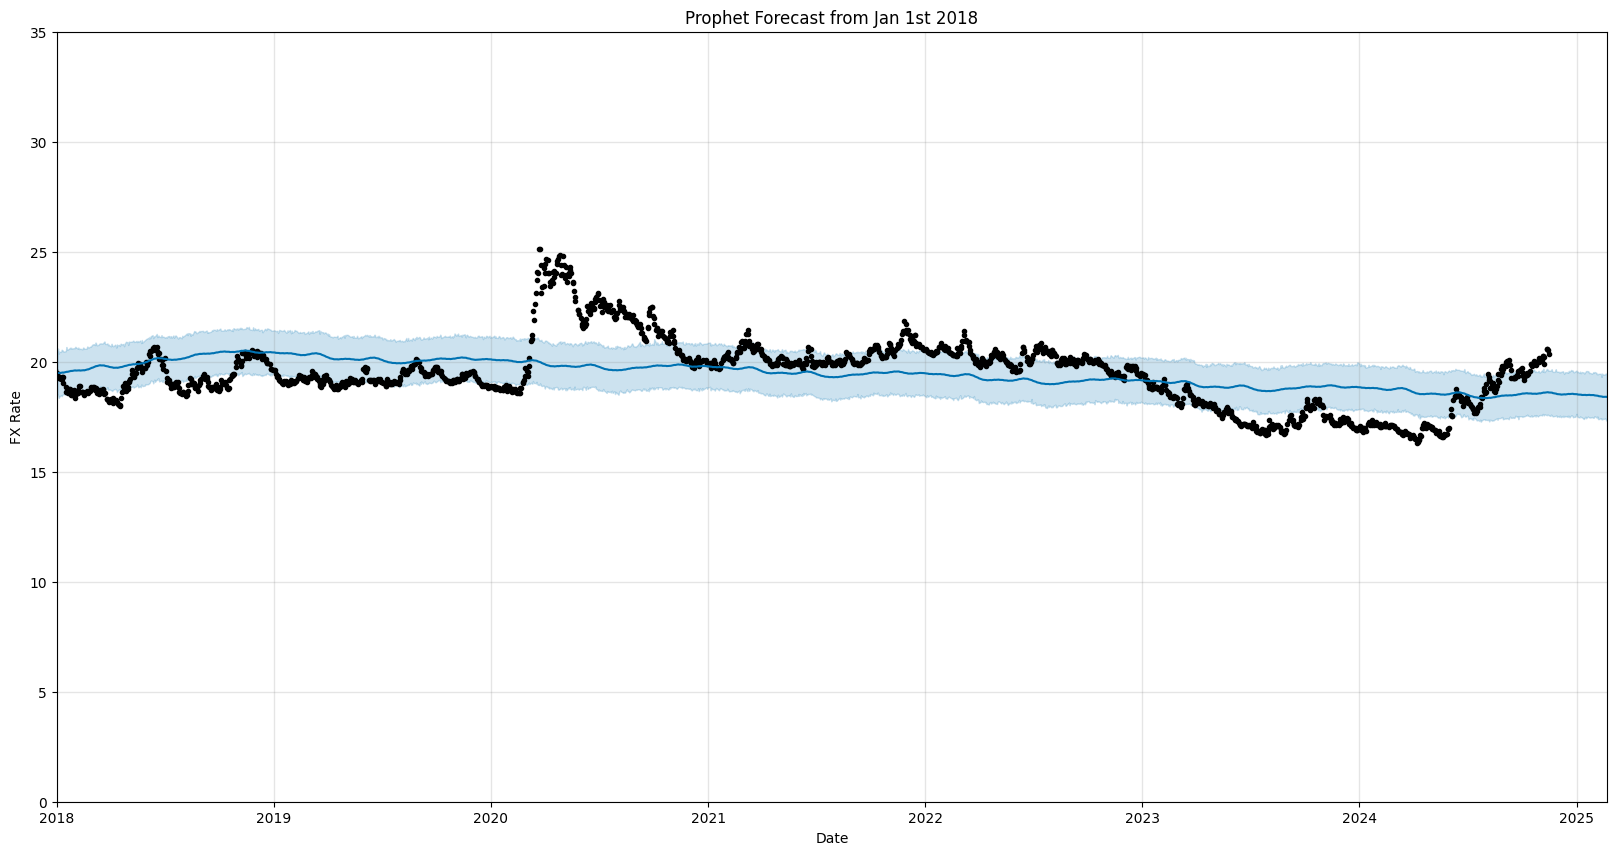

In [61]:
# Create a chart with a 7 year history to see whether it could be used as one of our final charts

# Create dataframe with data from begin Jan 2018
filtered_forecast = forecast_trends[forecast_trends['ds'] >= '2018-01-01']

# Calculate / Specify start and end dates
start_date = mdates.datestr2num('2018-01-01')
end_date = filtered_forecast['ds'].iloc[-1]

# Plot subplots
fig, ax = plt.subplots(figsize=(20, 10))

#Plot chart
model.plot(filtered_forecast, ax=ax)

#Set X, Y labels and Title
ax.set_xlabel('Date')
ax.set_ylabel('FX Rate')
ax.set_title('Prophet Forecast from Jan 1st 2018')

#Set X and Y limits
ax.set_xlim([start_date, end_date])
ax.set_ylim(bottom=0, top=35)

#Show plot
plt.show()

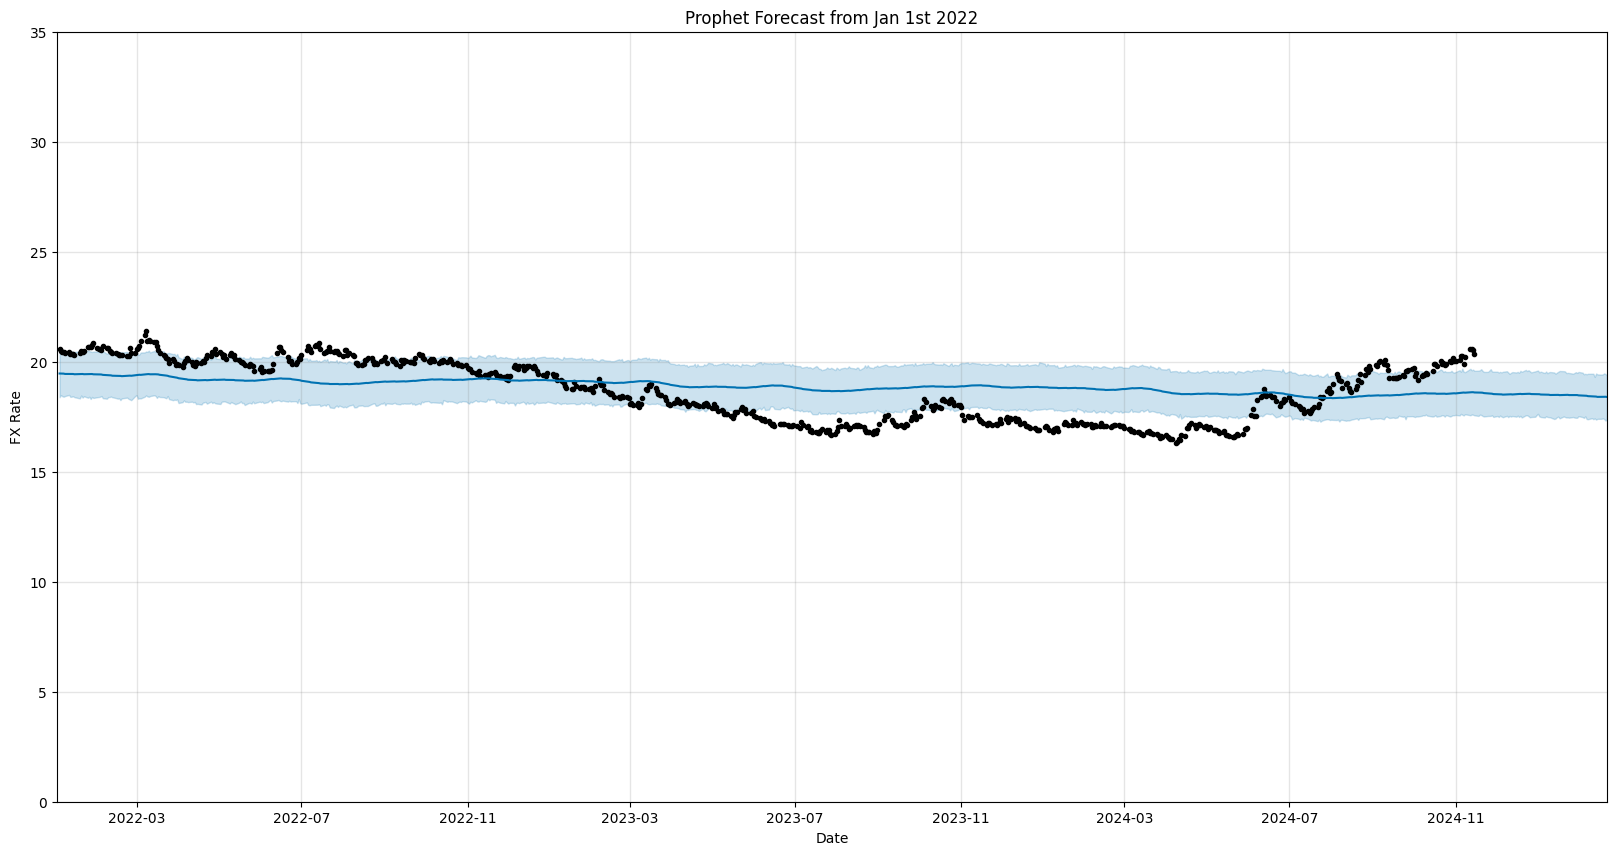

In [62]:
# Create a chart with a 3 year history to see whether it could be used as one of our final charts

# Create dataframe with data from begin Jan 2022
filtered_forecast = forecast_trends[forecast_trends['ds'] >= '2022-01-01']

# Calculate / Specify start and end dates
start_date = mdates.datestr2num('2022-01-01')
end_date = filtered_forecast['ds'].iloc[-1]

# Plot subplots
fig, ax = plt.subplots(figsize=(20, 10))

# Plot charts
model.plot(filtered_forecast, ax=ax)

#Set X, Y labels and Title
ax.set_xlabel('Date')
ax.set_ylabel('FX Rate')
ax.set_title('Prophet Forecast from Jan 1st 2022')

#Set X and Y limits
ax.set_xlim([start_date, end_date])
ax.set_ylim(bottom=0, top=35)

# Show plot
plt.show()

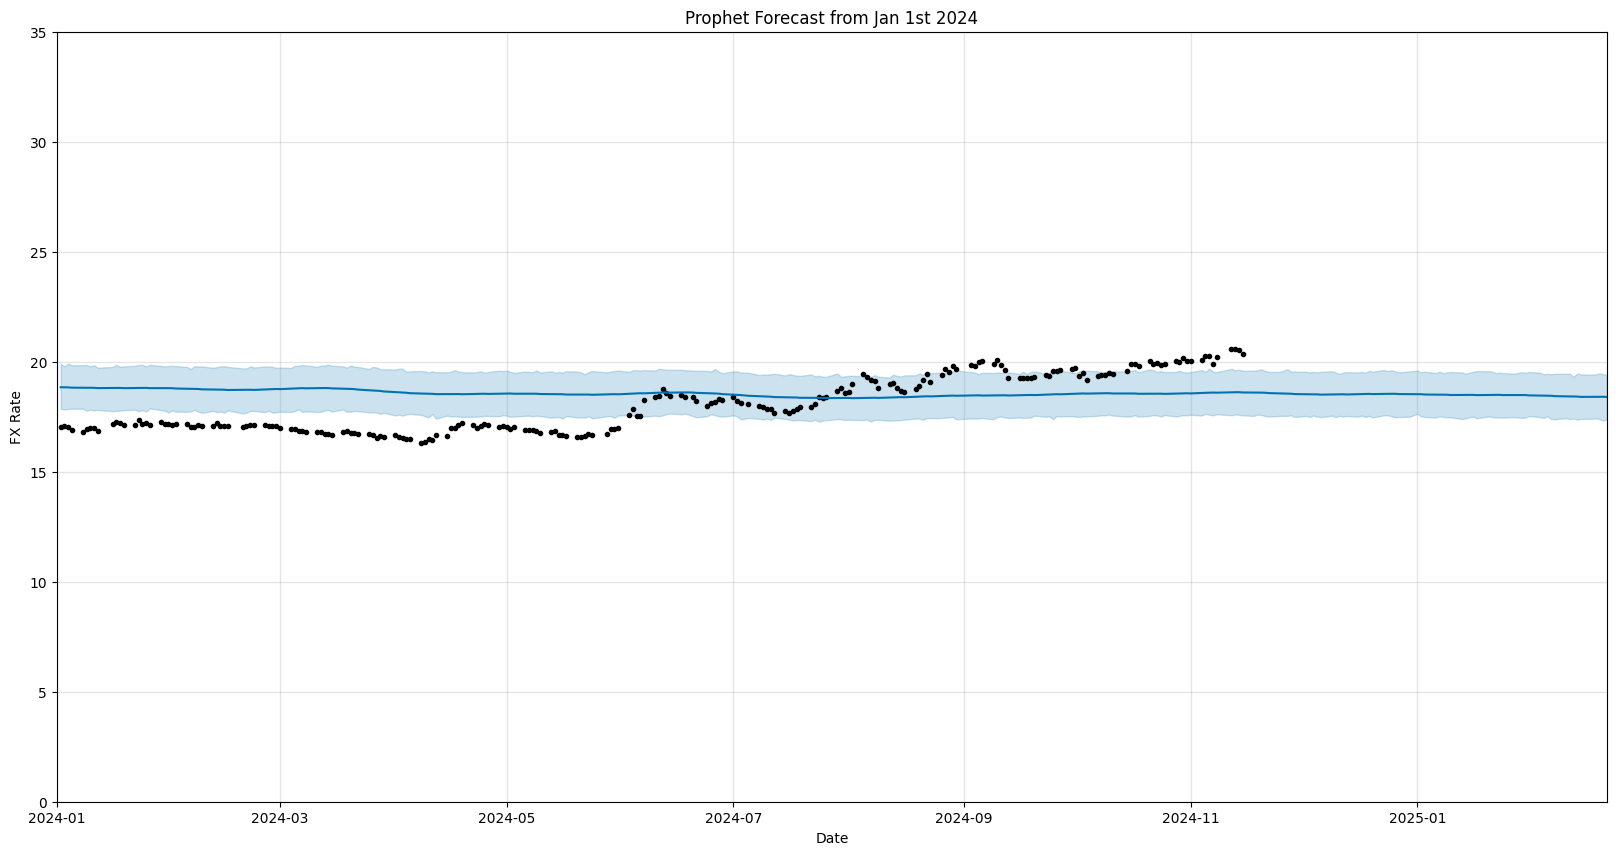

In [63]:
# Create a chart with a 1 year history to see whether it could be used as one of our final charts

# Create dataframe with data from begin Jan 2024
filtered_forecast = forecast_trends[forecast_trends['ds'] >= '2024-01-01']

# Calculate / Specify start and end dates
start_date = mdates.datestr2num('2024-01-01')
end_date = filtered_forecast['ds'].iloc[-1]

# Plot subplots
fig, ax = plt.subplots(figsize=(20, 10))

# Plot charts
model.plot(filtered_forecast, ax=ax)

#Set X, Y labels and Title
ax.set_xlabel('Date')
ax.set_ylabel('FX Rate')
ax.set_title('Prophet Forecast from Jan 1st 2024')

#Set X and Y limits
ax.set_xlim([start_date, end_date])
ax.set_ylim(bottom=0, top=35)

# Show plot
plt.show()

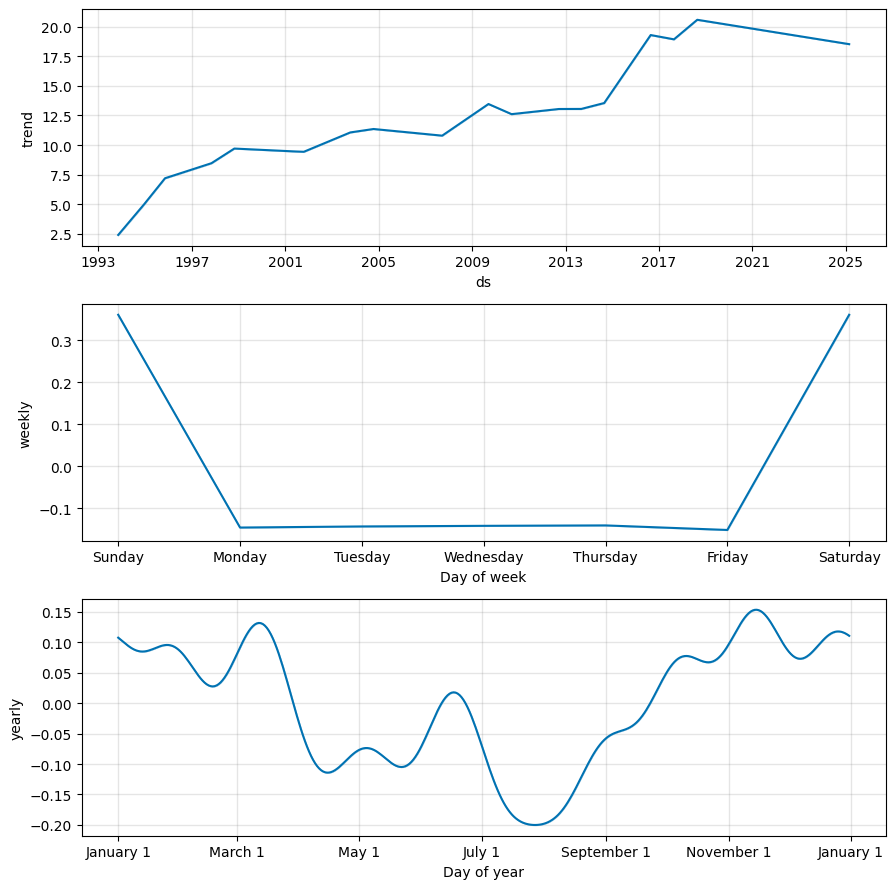

In [64]:
# Use the plot_components function to visualize the forecast results
figures = model.plot_components(forecast_trends)

In [65]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends = forecast_trends.set_index(["ds"])
forecast_trends.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
1993-11-08,2.416464,1.374746,3.450786,2.416464,2.416464,-0.009379,-0.009379,-0.009379,-0.145328,-0.145328,-0.145328,0.135949,0.135949,0.135949,0.0,0.0,0.0,2.407085
1993-11-09,2.422815,1.401384,3.480524,2.422815,2.422815,-0.002158,-0.002158,-0.002158,-0.142703,-0.142703,-0.142703,0.140545,0.140545,0.140545,0.0,0.0,0.0,2.420657
1993-11-10,2.429166,1.384673,3.460019,2.429166,2.429166,0.003299,0.003299,0.003299,-0.141262,-0.141262,-0.141262,0.144561,0.144561,0.144561,0.0,0.0,0.0,2.432465
1993-11-12,2.441867,1.423923,3.500679,2.441867,2.441867,-0.000555,-0.000555,-0.000555,-0.151077,-0.151077,-0.151077,0.150521,0.150521,0.150521,0.0,0.0,0.0,2.441311
1993-11-15,2.460918,1.452955,3.416416,2.460918,2.460918,0.008101,0.008101,0.008101,-0.145328,-0.145328,-0.145328,0.153429,0.153429,0.153429,0.0,0.0,0.0,2.469019


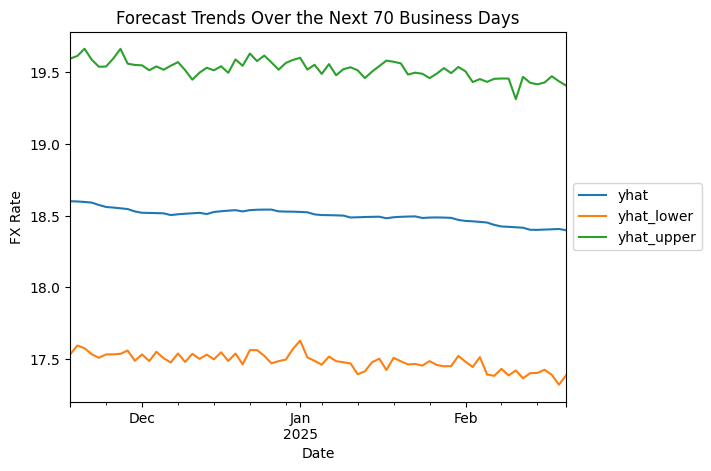

In [66]:
# From the `forecast_trends` DataFrame, plot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 70 businesss days
forecast_trends[["yhat", "yhat_lower", "yhat_upper"]].iloc[-70:, :].plot()

# Customize the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place the legend outside on the right

plt.xlabel("Date")
plt.ylabel("FX Rate")
plt.title("Forecast Trends Over the Next 70 Business Days")
plt.show()

In [67]:
# Create a DataFrame that contains just last 70 businesss days
forecast_90_days = forecast_trends.iloc[-70:, :][["yhat_upper", "yhat_lower", "yhat"]]

forecast_90_days = forecast_90_days.rename(
     columns={
        "yhat_upper": "Best Case",
        "yhat_lower": "Worst Case",
        "yhat": "Most Likely Case"
    }
)

# Review the last five rows of the DataFrame
forecast_90_days.tail()

,Best Case,Worst Case,Most Likely Case
ds,,,
2025-02-17,19.414477,17.404830,18.401098
2025-02-18,19.426963,17.427148,18.403245
2025-02-19,19.470598,17.391971,18.405051
2025-02-20,19.435419,17.322952,18.407263
2025-02-21,19.405405,17.388826,18.398487


In [68]:
#Display the average price by month, so that index shows year and month
forecast_90_days = forecast_90_days.groupby([forecast_90_days.index.year, forecast_90_days.index.month]).mean()

forecast_90_days

Best Case  Worst Case  Most Likely Case
ds   ds                                         
2024 11  19.589104   17.541052         18.570283
     12  19.542729   17.517170         18.525277
2025 1   19.518666   17.479649         18.494383
     2   19.435579   17.411642         18.424443